<a href="https://colab.research.google.com/github/Amro2023/airbus-localization-model/blob/main/Amro_Osman_CYU_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Check-Your-Understanding 3 Instructions**



*   Carefully read each question under your assigned tasks and complete all the work in the assigned Colab Notebook.
*   If you have any questions or run into issues, try to solve them independently first or collaborate with your peers. Your instructor should be your last resort for help.
*   You are required to submit your completed Colab Notebook on Google Classroom before the deadline. Late submission is strongly not encouraged, but it can be accepted with a 10% penalty.
*   Please do not modify any raw data or formulas unless explicitly instructed. Violating this rule will result in a desk rejection and a score of zero.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Problem Statement:***

During the tenth flight test of the Starship, a video was recorded to capture the entire experiment. As SpaceX begins interviewing you for a potential position (be confident — you’ve got what it takes to be part of the team!), your assigned task is to analyze the flight pattern changes across the past ten tests.

Your first objective is to transform the video content into a format that enables advanced AI models to effectively interpret and extract insights—ultimately helping the team identify potential areas for improvement in future flight experiments.

# **Tasks:**
**1. Audio Extraction:** Extract the audio track from the video.

**2. Image Extraction:** Extract all image frames from the video at 1-second intervals.

**3. Image Representation and Merging:** Use the VGG16 model to generate a 1×25,088 feature vector for each image, then combine them into an N×25,088 matrix, where N is the total number of extracted frames.

**4. Image Captioning and Text Embedding:** Use BLIP to generate short descriptive captions for each image, then apply BERT to encode these captions into embeddings. Merge all BERT embeddings into an N×768 matrix, where N corresponds to the number of extracted images.

***Hint:*** The model may need some time to process and translate the image into text.

**5. Audio Representation:** Use VGGish to produce a N×128 normalized feature vector representing the audio content of the video.


🧩 **Hints About Final Representation Dimensions**
- Image: [135, 25088]
- Image --> BLIP --> BERT: [135, 768]
- Audio: [140, 128]


In [5]:
# Task 1. Audio Extraction

import os

INPUT_VIDEO = "/content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_Starship_Tenth_Flight_Test.mp4"
OUTPUT_DIR  = "/content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_outputs"

os.makedirs(OUTPUT_DIR, exist_ok=True)

print("Video path:", INPUT_VIDEO)
print("Output dir:", OUTPUT_DIR)

# Check ffmpeg is available
!ffmpeg -version || (sudo apt-get update -y && sudo apt-get install -y ffmpeg)

# Extract audio in three formats with ffmpeg
import os

base = os.path.splitext(os.path.basename(INPUT_VIDEO))[0]

wav_48k = os.path.join(OUTPUT_DIR, f"{base}_audio_48k_stereo.wav")
wav_16k = os.path.join(OUTPUT_DIR, f"{base}_audio_16k_mono.wav")
mp3_128 = os.path.join(OUTPUT_DIR, f"{base}_audio_128kbps.mp3")

# High-fidelity WAV: 48 kHz stereo, 16-bit PCM
!ffmpeg -y -i "{INPUT_VIDEO}" -vn -acodec pcm_s16le -ar 48000 -ac 2 "{wav_48k}"

# Model-friendly WAV: 16 kHz mono, 16-bit PCM (common for ASR/AI)
!ffmpeg -y -i "{INPUT_VIDEO}" -vn -acodec pcm_s16le -ar 16000 -ac 1 "{wav_16k}"

# Compact MP3: 128 kbps CBR
!ffmpeg -y -i "{INPUT_VIDEO}" -vn -codec:a libmp3lame -b:a 128k "{mp3_128}"

print("Saved files:")
print(" -", wav_48k)
print(" -", wav_16k)
print(" -", mp3_128)

# Verify durations/sizes and preview audio
import os, subprocess, json
from IPython.display import Audio, display

def probe(path):
    try:
        result = subprocess.run(
            ['ffprobe', '-v', 'error', '-show_entries', 'format=duration',
             '-of', 'json', path],
            stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True, check=True
        )
        dur = float(json.loads(result.stdout)["format"]["duration"])
    except Exception:
        dur = None
    size_mb = os.path.getsize(path) / (1024 * 1024)
    return dur, size_mb

for p in [wav_48k, wav_16k, mp3_128]:
    dur, size_mb = probe(p)
    print(f"{os.path.basename(p)}  |  duration: {dur:.2f}s  |  size: {size_mb:.2f} MB")

print("\nPreview (16 kHz mono WAV):")
display(Audio(filename=wav_16k))



Video path: /content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_Starship_Tenth_Flight_Test.mp4
Output dir: /content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_outputs
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshi

Video path: /content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_Starship_Tenth_Flight_Test.mp4
Frames output folder: /content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_frames
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --

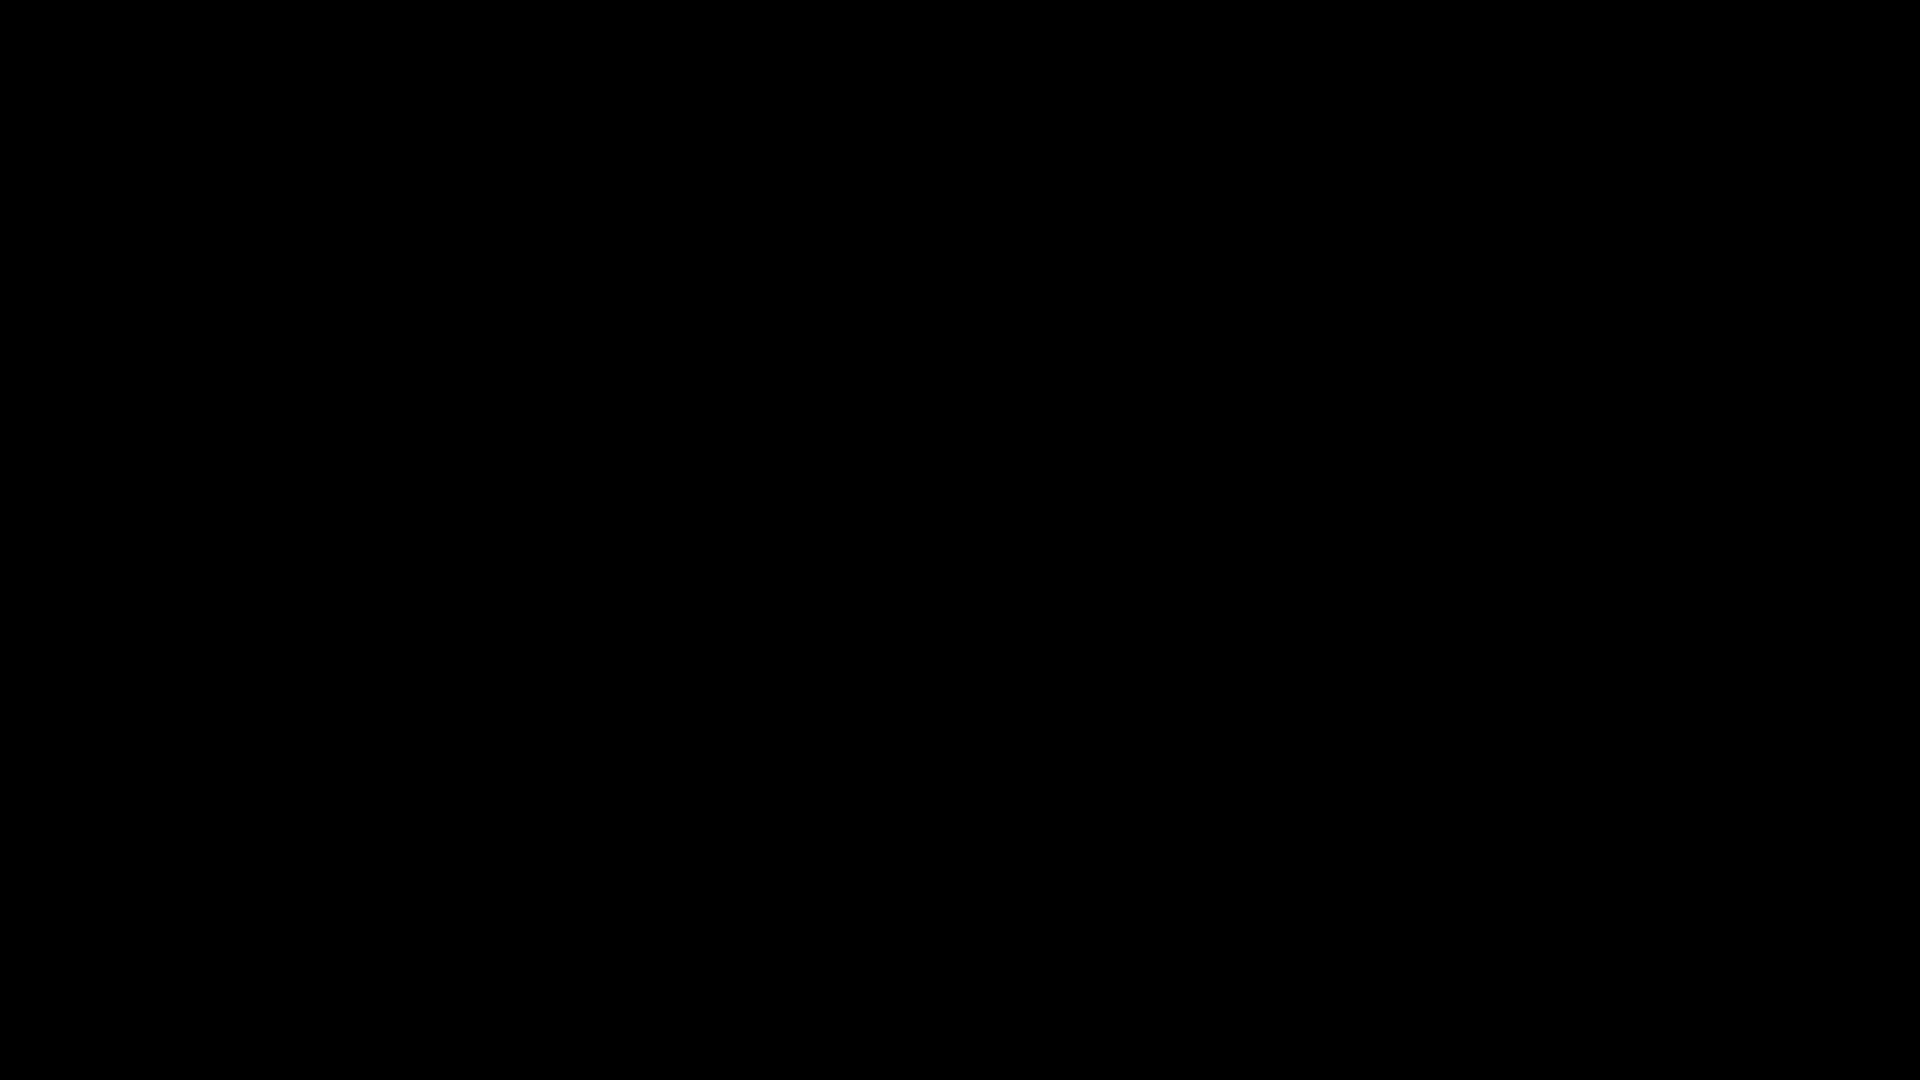

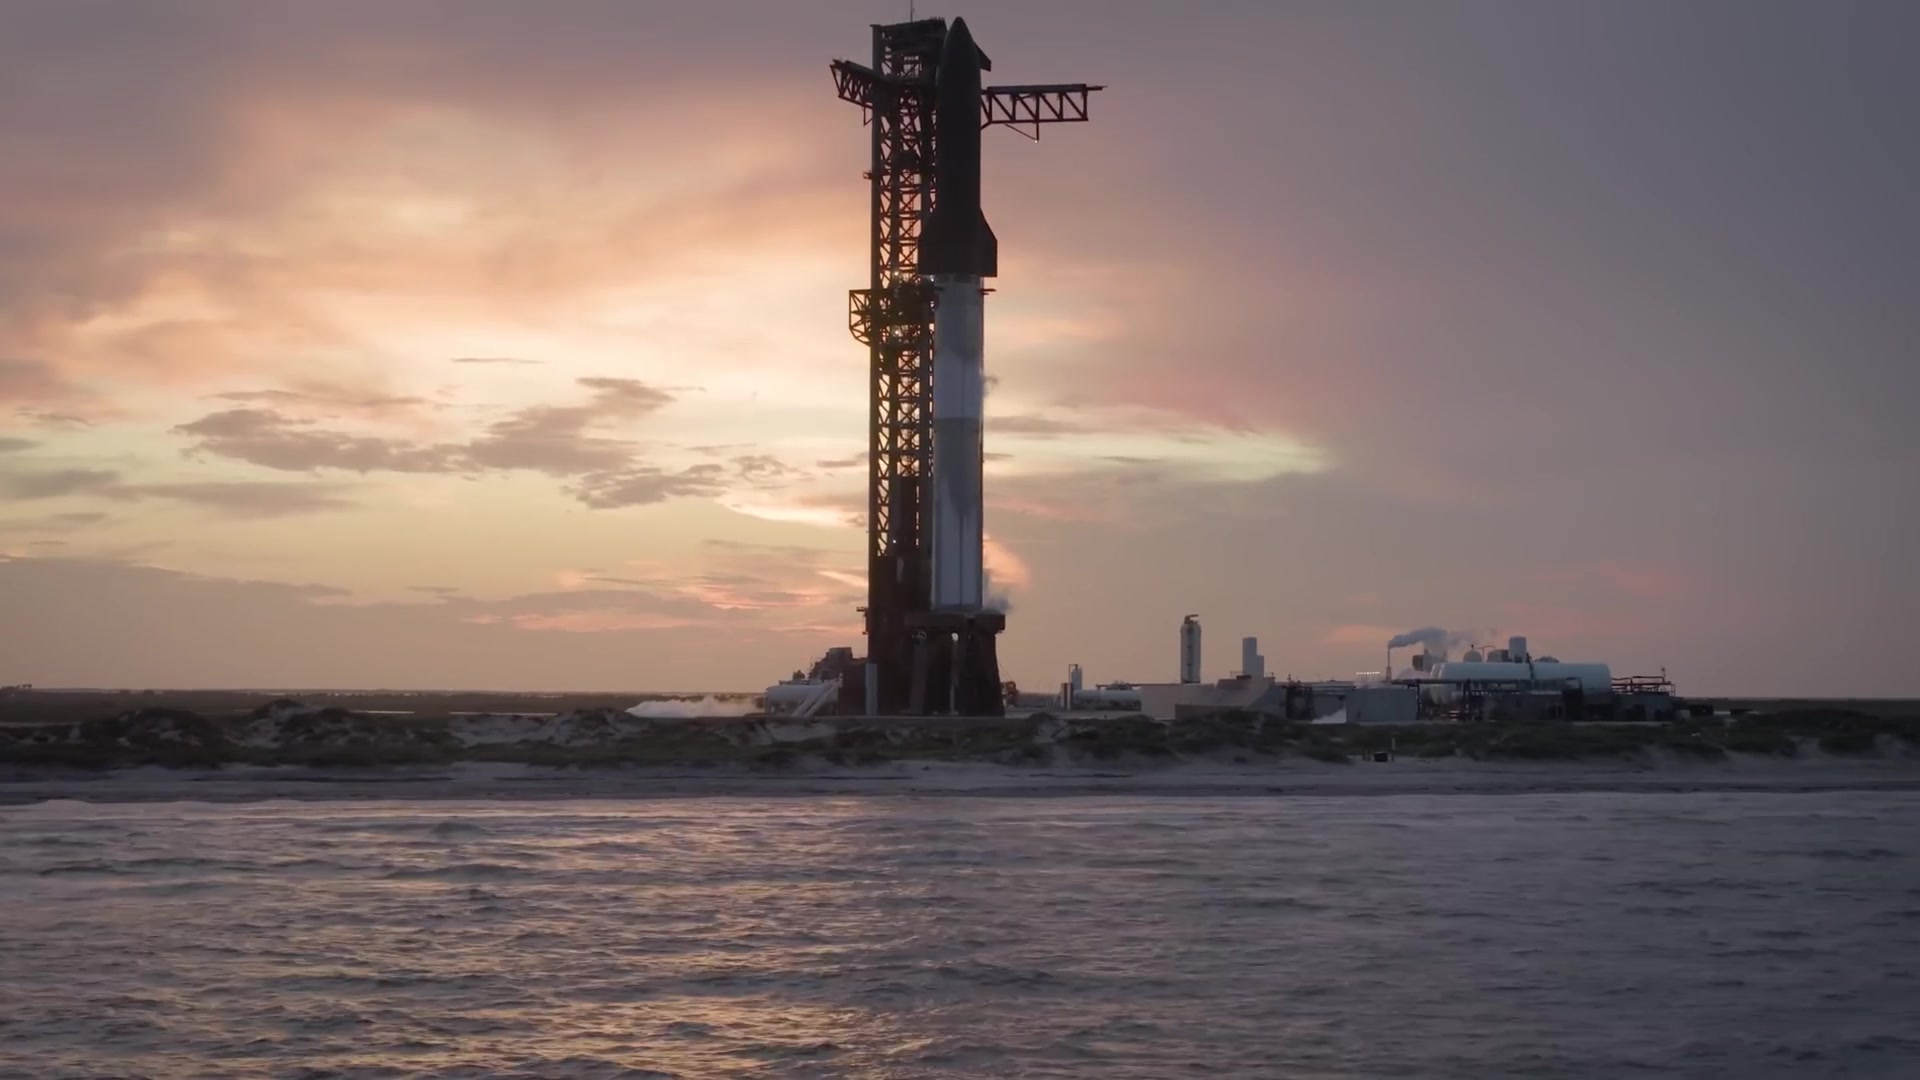

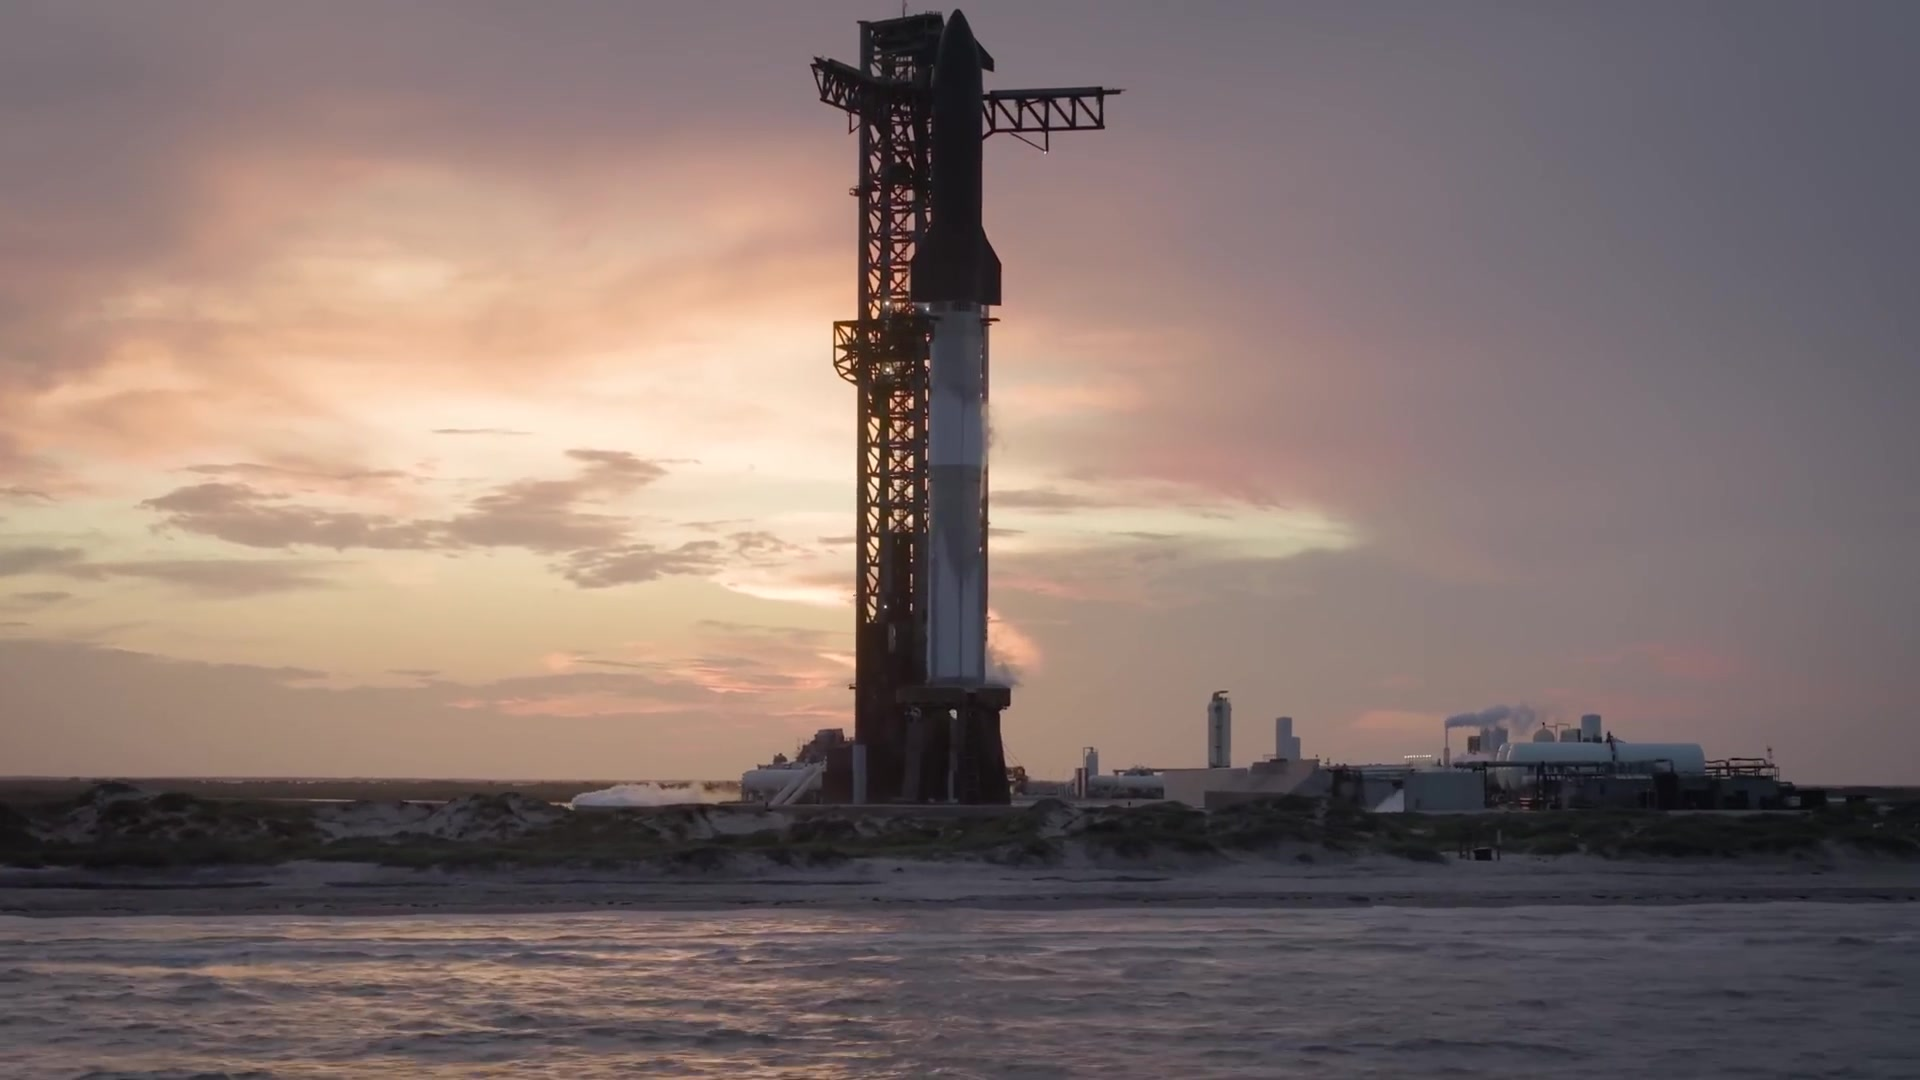

In [8]:
# Task 2. Image Extraction

import os

# Reuse video from Task 1
INPUT_VIDEO = "/content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_Starship_Tenth_Flight_Test.mp4"
FRAMES_DIR  = "/content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_frames"

os.makedirs(FRAMES_DIR, exist_ok=True)

print("Video path:", INPUT_VIDEO)
print("Frames output folder:", FRAMES_DIR)

# Extract image frames every 1 second using ffmpeg
# %04d ensures filenames like frame_0001.jpg, frame_0002.jpg, etc.

!ffmpeg -i "{INPUT_VIDEO}" -vf fps=1 "{FRAMES_DIR}/frame_%04d.jpg"

# Verify that frames were extracted and preview a few of them

import os
from IPython.display import Image, display

# Count frames
frames = sorted([f for f in os.listdir(FRAMES_DIR) if f.endswith(".jpg")])
print(f"Extracted {len(frames)} frames.")
print("First few frame files:", frames[:5])

# Display the first 3 frames to confirm extraction
for f in frames[:3]:
    display(Image(filename=os.path.join(FRAMES_DIR, f)))


In [12]:
# Task 3. Image Representation and Merging
# (VGG16)
import os

# Your frames folder from Task 2
FRAMES_DIR = "/content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_frames"
OUT_DIR    = "/content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_features"
os.makedirs(OUT_DIR, exist_ok=True)

# Collect frames (sorted for deterministic ordering)
frames = sorted([os.path.join(FRAMES_DIR, f) for f in os.listdir(FRAMES_DIR) if f.lower().endswith((".jpg",".jpeg",".png"))])

print(f"Found {len(frames)} frame images.")
if len(frames) > 0:
    print("First 5:", [os.path.basename(p) for p in frames[:5]])
else:
    print("No frames found. Re-run Task 2 or check FRAMES_DIR.")

# Load VGG16 backbone (pretrained ImageNet), output conv features
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

print("TensorFlow version:", tf.__version__)
print("GPU available:", bool(tf.config.list_physical_devices('GPU')))

# VGG16 without classification head; I want the conv feature map
model = VGG16(weights="imagenet", include_top=False)  # output shape: (None, 7, 7, 512)
model.trainable = False

INPUT_SIZE = (224, 224)  # VGG16 expected input

import numpy as np
from math import ceil
import gc

BATCH_SIZE = 32  # Can be 8 or 16 if memory limits are reached

def load_and_preprocess_batch(batch_paths):
    batch = []
    for p in batch_paths:
        img = load_img(p, target_size=INPUT_SIZE)
        arr = img_to_array(img)  # HWC, float32
        batch.append(arr)
    batch = np.stack(batch, axis=0)            # (B, 224, 224, 3)
    batch = preprocess_input(batch.astype(np.float32))
    return batch

N = len(frames)
if N == 0:
    raise ValueError("No frames to process. Make sure Task 2 produced images in FRAMES_DIR.")

# We will store features row-by-row: shape (N, 25088)
FEATURE_SIZE = 7 * 7 * 512  # 25,088
features = np.memmap(
    filename=os.path.join(OUT_DIR, "vgg16_features_float32.mmap"),
    dtype="float32",
    mode="w+",
    shape=(N, FEATURE_SIZE),
)

num_batches = ceil(N / BATCH_SIZE)
print(f"Extracting features in {num_batches} batches...")

start_idx = 0
for b in range(num_batches):
    batch_paths = frames[b*BATCH_SIZE : (b+1)*BATCH_SIZE]
    x = load_and_preprocess_batch(batch_paths)
    # (B, 7, 7, 512)
    feat_map = model.predict(x, verbose=0)
    # Flatten to (B, 25088)
    flat = feat_map.reshape((feat_map.shape[0], -1))
    end_idx = start_idx + flat.shape[0]
    features[start_idx:end_idx, :] = flat
    start_idx = end_idx
    del x, feat_map, flat
    gc.collect()
    if (b+1) % 5 == 0 or (b+1) == num_batches:
        print(f"Batch {b+1}/{num_batches} done")

# Flush memmap to disk
features.flush()

# Also save a small index mapping (row -> filename)
index_csv = os.path.join(OUT_DIR, "frame_index.csv")
with open(index_csv, "w") as f:
    f.write("row,filename\n")
    for i, p in enumerate(frames):
        f.write(f"{i},{os.path.basename(p)}\n")

print("\nSaved:")
print(" -", os.path.join(OUT_DIR, "vgg16_features_float32.mmap"), f"(shape=({N}, {FEATURE_SIZE}))")
print(" -", index_csv)

import numpy as np
import os

OUT_DIR = "/content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_features"
FEATURE_SIZE = 7 * 7 * 512

# Re-open memmap in read-only mode
frames_count = sum(1 for _ in open(os.path.join(OUT_DIR, "frame_index.csv"))) - 1  # minus header
feats = np.memmap(
    filename=os.path.join(OUT_DIR, "vgg16_features_float32.mmap"),
    dtype="float32",
    mode="r",
    shape=(frames_count, FEATURE_SIZE),
)

print("Feature matrix shape:", feats.shape)   # Expect (N, 25088)
print("One row length:", feats.shape[1])
print("Sample row stats (row 0):", float(feats[0].mean()), float(feats[0].std()))



Found 134 frame images.
First 5: ['frame_0001.jpg', 'frame_0002.jpg', 'frame_0003.jpg', 'frame_0004.jpg', 'frame_0005.jpg']
TensorFlow version: 2.19.0
GPU available: False
Extracting features in 5 batches...
Batch 5/5 done

Saved:
 - /content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_features/vgg16_features_float32.mmap (shape=(134, 25088))
 - /content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_features/frame_index.csv
Feature matrix shape: (134, 25088)
One row length: 25088
Sample row stats (row 0): 0.11492430418729782 1.7155346870422363


In [16]:
# Task 4. Image Captioning and Text Embedding
# Setup: install deps and define paths

!pip -q install transformers==4.44.2 timm==1.0.9 torch --extra-index-url https://download.pytorch.org/whl/cu121
# Colab falls back to CPU, it's still fine—just slower.

import os

FRAMES_DIR = "/content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_frames"
OUT_DIR    = "/content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_text"
os.makedirs(OUT_DIR, exist_ok=True)

print("Frames:", FRAMES_DIR)
print("Outputs:", OUT_DIR)

# Load BLIP (image captioning)

import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# BLIP base (good balance of speed/quality)
BLIP_MODEL = "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained(BLIP_MODEL)
blip = BlipForConditionalGeneration.from_pretrained(BLIP_MODEL).to(device)
blip.eval()

# Caption frames with BLIP (short descriptions)

import os
from PIL import Image
import pandas as pd
from math import ceil
from tqdm.auto import tqdm
import torch

# Collect frames (sorted for deterministic row order)
frames = sorted([os.path.join(FRAMES_DIR, f)
                 for f in os.listdir(FRAMES_DIR)
                 if f.lower().endswith((".jpg",".jpeg",".png"))])

assert len(frames) > 0, "No frames found. Re-run Task 2 or check FRAMES_DIR."

BATCH_SIZE = 16  # adjust up/down based on VRAM/CPU RAM
captions = []

for b in tqdm(range(ceil(len(frames)/BATCH_SIZE)), desc="Captioning"):
    batch_paths = frames[b*BATCH_SIZE:(b+1)*BATCH_SIZE]
    images = [Image.open(p).convert("RGB") for p in batch_paths]
    inputs = processor(images=images, return_tensors="pt").to(device)

    with torch.no_grad():
        # max_new_tokens: keeps captions short; tweak if you want more detail
        out_ids = blip.generate(**inputs, max_new_tokens=20)
    batch_caps = processor.batch_decode(out_ids, skip_special_tokens=True)
    batch_caps = [c.strip() for c in batch_caps]

    for p, c in zip(batch_paths, batch_caps):
        captions.append((os.path.basename(p), c))

# Save captions to CSV (row order == frames order)
captions_df = pd.DataFrame(captions, columns=["filename", "caption"])
captions_df.insert(0, "row", range(len(captions_df)))
cap_csv = os.path.join(OUT_DIR, "captions.csv")
captions_df.to_csv(cap_csv, index=False)
print("Saved:", cap_csv)
display(captions_df.head())



Frames: /content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_frames
Outputs: /content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_text
Using device: cpu


Captioning:   0%|          | 0/9 [00:00<?, ?it/s]

Saved: /content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_text/captions.csv


row        filename                                            caption
0    0  frame_0001.jpg     a black background with a white and red flower
1    1  frame_0002.jpg      a rocket is seen in the sky as it is launched
2    2  frame_0003.jpg  a rocket is seen in the sky as it sits on the ...
3    3  frame_0004.jpg              a rocket is seen in the sky at sunset
4    4  frame_0005.jpg           a rocket is sitting on top of a building

In [18]:
# Task 4 Cont —  BERT embeddings for captions (N x 768)

import os
import numpy as np
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

OUT_DIR = "/content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_text"
cap_csv = os.path.join(OUT_DIR, "captions.csv")

# 1) Load captions
caps = pd.read_csv(cap_csv)
texts = caps["caption"].fillna("").astype(str).tolist()
N = len(texts)
print(f"Captions loaded: {N}")

# 2) Load BERT-base (hidden size = 768)
bert_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(bert_name)
bert = BertModel.from_pretrained(bert_name).to(device)
bert.eval()

# 3) Encode in batches to avoid OOM
BATCH_SIZE = 32
emb_list = []

with torch.no_grad():
    for i in tqdm(range(0, N, BATCH_SIZE), desc="BERT encoding"):
        batch_texts = texts[i:i+BATCH_SIZE]
        enc = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=64,   # captions are short; 64 is plenty
            return_tensors="pt"
        ).to(device)

        outputs = bert(**enc)                       # last_hidden_state: (B, L, 768)
        cls_emb = outputs.last_hidden_state[:, 0, :] # [CLS] at position 0 → (B, 768)
        emb_list.append(cls_emb.cpu().numpy())

embeddings = np.vstack(emb_list)                   # (N, 768)
print("Embeddings shape:", embeddings.shape)

# 4) Save matrix + index
emb_path = os.path.join(OUT_DIR, "bert_caption_embeddings_Nx768.npy")
np.save(emb_path, embeddings)
print("Saved embeddings:", emb_path)

idx_path = os.path.join(OUT_DIR, "bert_index.csv")
caps.to_csv(idx_path, index=False)
print("Saved index:", idx_path)

# 5) Quick peek
print("\nSample rows:")
display(caps.head(3))

# Recheck output
import os, numpy as np, pandas as pd

OUT_DIR = "/content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_text"
EMB = np.load(os.path.join(OUT_DIR, "bert_caption_embeddings_Nx768.npy"))
IDX = pd.read_csv(os.path.join(OUT_DIR, "bert_index.csv"))

print("Embeddings shape:", EMB.shape)   # Expect (N, 768) — N should match your frames count (≈134)
print("Row 0 L2 norm:", float(np.linalg.norm(EMB[0])))

display(IDX.head(3))



Using device: cpu
Captions loaded: 134


/usr/local/lib/python3.12/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERT encoding:   0%|          | 0/5 [00:00<?, ?it/s]

Embeddings shape: (134, 768)
Saved embeddings: /content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_text/bert_caption_embeddings_Nx768.npy
Saved index: /content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_text/bert_index.csv

Sample rows:


row        filename                                            caption
0    0  frame_0001.jpg     a black background with a white and red flower
1    1  frame_0002.jpg      a rocket is seen in the sky as it is launched
2    2  frame_0003.jpg  a rocket is seen in the sky as it sits on the ...

Embeddings shape: (134, 768)
Row 0 L2 norm: 15.425353050231934


row        filename                                            caption
0    0  frame_0001.jpg     a black background with a white and red flower
1    1  frame_0002.jpg      a rocket is seen in the sky as it is launched
2    2  frame_0003.jpg  a rocket is seen in the sky as it sits on the ...

In [33]:
# Task 5. Audio Representation

# Task 5 — VGGish embeddings (N x 128), L2-normalized [Shape-Robust Final]

import os
import numpy as np
import pandas as pd
import librosa
import torch
from torchvggish import vggish_input

# --- paths ---
AUDIO_16K = "/content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_outputs/CYU_3_Starship_Tenth_Flight_Test_audio_16k_mono.wav"
OUT_DIR   = "/content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_audio"
os.makedirs(OUT_DIR, exist_ok=True)

# 1) Load audio @ 16 kHz mono
y, sr = librosa.load(AUDIO_16K, sr=16000, mono=True)
assert sr == 16000, "Audio must be 16 kHz mono for VGGish."

# 2) Waveform -> log-mel examples (~0.96 s windows)
examples = vggish_input.waveform_to_examples(y, sr)  # np.ndarray or torch.Tensor
# Normalize to a torch.FloatTensor with shape (N, 1, 96, 64)
if isinstance(examples, np.ndarray):
    if examples.ndim == 3:        # (N, 96, 64)
        x = torch.from_numpy(examples).unsqueeze(1)
    elif examples.ndim == 4:      # (N, 1, 96, 64)
        x = torch.from_numpy(examples)
    else:
        raise ValueError(f"Unexpected examples shape (numpy): {examples.shape}")
else:
    # torch.Tensor
    if examples.ndim == 3:        # (N, 96, 64)
        x = examples.unsqueeze(1)
    elif examples.ndim == 4:      # (N, 1, 96, 64)
        x = examples
    else:
        raise ValueError(f"Unexpected examples shape (tensor): {examples.shape}")

x = x.float()  # ensure float32
num_windows = x.shape[0]
print("Num audio windows (~0.96 s each):", num_windows)

# 3) Build VGGish model (handle different torchvggish APIs)
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)
x = x.to(device)

model = None
try:
    from torchvggish.vggish import VGGish
    model = VGGish(pretrained=True).to(device)
except Exception:
    import torchvggish
    try:
        model = torchvggish.VGGish(pretrained=True).to(device)
    except Exception:
        model = torchvggish.vggish().to(device)  # factory without 'pretrained' kw

model.eval()

# 4) Forward pass -> (N, 128)
with torch.no_grad():
    emb = model(x).detach().cpu().numpy().astype("float32")

# 5) L2-normalize rows
emb_norm = emb / (np.linalg.norm(emb, axis=1, keepdims=True) + 1e-8)

# 6) Timestamp index (~0.96 s hop)
HOP_SEC = 0.96
start_times = np.arange(num_windows, dtype=np.float32) * HOP_SEC

# 7) Save artifacts
np.save(os.path.join(OUT_DIR, "audio_vggish_embeddings_Nx128.npy"), emb_norm)
pd.DataFrame({
    "row": np.arange(num_windows, dtype=int),
    "start_time_sec": start_times
}).to_csv(os.path.join(OUT_DIR, "audio_vggish_index.csv"), index=False)

print("✅ Saved embeddings and index to:", OUT_DIR)

# Task 5 — Recheck
import os, numpy as np, pandas as pd

AUDIO_OUT = "/content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_audio"

EMB = np.load(os.path.join(AUDIO_OUT, "audio_vggish_embeddings_Nx128.npy"))
IDX = pd.read_csv(os.path.join(AUDIO_OUT, "audio_vggish_index.csv"))

print("Embeddings shape:", EMB.shape)     # expect ~ (140, 128)
print("Row 0 L2 norm (≈1.0):", float(np.linalg.norm(EMB[0])))
print("First 5 timestamps (sec):", IDX["start_time_sec"].head().round(2).tolist())
display(IDX.head(3))



Num audio windows (~0.96 s each): 140
Using device: cpu
✅ Saved embeddings and index to: /content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025/CYU_3_audio
Embeddings shape: (140, 128)
Row 0 L2 norm (≈1.0): 0.9999999403953552
First 5 timestamps (sec): [0.0, 0.96, 1.92, 2.88, 3.84]


row  start_time_sec
0    0            0.00
1    1            0.96
2    2            1.92

In [34]:
# Final Summary - Shape side by Side

import os, numpy as np, pandas as pd

BASE = "/content/drive/MyDrive/Colab Notebooks/DATA 6505_Fall_2025"

# Image features (VGG16)
IMG_DIR = os.path.join(BASE, "CYU_3_features")
img_shape = None
if os.path.exists(os.path.join(IMG_DIR, "vgg16_features_float32.mmap")):
    # Use frame_index.csv to discover N
    frames_count = sum(1 for _ in open(os.path.join(IMG_DIR, "frame_index.csv"))) - 1
    feats = np.memmap(os.path.join(IMG_DIR, "vgg16_features_float32.mmap"),
                      dtype="float32", mode="r", shape=(frames_count, 7*7*512))
    img_shape = feats.shape
elif os.path.exists(os.path.join(IMG_DIR, "vgg16_features_134x25088.npz")):
    feats = np.load(os.path.join(IMG_DIR, "vgg16_features_134x25088.npz"))["feats"]
    img_shape = feats.shape
else:
    img_shape = "(not found)"

# Text embeddings (BERT)
TXT_DIR = os.path.join(BASE, "CYU_3_text")
txt_path = os.path.join(TXT_DIR, "bert_caption_embeddings_Nx768.npy")
txt_shape = np.load(txt_path).shape if os.path.exists(txt_path) else "(not found)"

# Audio embeddings (VGGish)
AUD_DIR = os.path.join(BASE, "CYU_3_audio")
aud_path = os.path.join(AUD_DIR, "audio_vggish_embeddings_Nx128.npy")
aud_shape = np.load(aud_path).shape if os.path.exists(aud_path) else "(not found)"

print("Image (VGG16):", img_shape)   # expect ≈ (134, 25088)
print("Text  (BERT) :", txt_shape)   # expect ≈ (134, 768)
print("Audio (VGGish):", aud_shape)  # expect ≈ (140, 128)


Image (VGG16): (134, 25088)
Text  (BERT) : (134, 768)
Audio (VGGish): (140, 128)


We extracted 134 video frames (1 fps), generated VGG16 image features (134×25088), captioned frames with BLIP and embedded captions via BERT (134×768), and computed VGGish audio embeddings (~140×128 at 0.96s hops). Outputs are saved under CYU_3_features, CYU_3_text, and CYU_3_audio. Shapes match the assignment hints; alignment to 1 Hz is optional if needed.